<a href="https://colab.research.google.com/github/xiomara-udea/COMPETENCIA-AI4ENG-UDEA---Semestre-2025-1/blob/main/02_preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [203]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [346]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
%matplotlib inline

In [347]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (10).json


{'kaggle (10).json': b'{"username":"xiomaraperezudea","key":"c7779ed01610d092aea8f2d5f696098f"}'}

In [276]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [321]:
!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia

udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [221]:
!unzip -l udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
  4716673  2025-03-25 16:54   submission_example.csv
 59185250  2025-03-25 16:54   test.csv
143732449  2025-03-25 16:54   train.csv
---------                     -------
207634372                     3 files


In [209]:
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [348]:
!ls -lash *.csv

4.5M -rw-r--r-- 1 root root 4.5M Mar 25 16:54 submission_example.csv
 57M -rw-r--r-- 1 root root  57M Mar 25 16:54 test.csv
138M -rw-r--r-- 1 root root 138M Mar 25 16:54 train.csv


In [349]:
dtr = pd.read_csv("train.csv")
print (dtr.shape)

(692500, 21)


In [350]:
dtr.head()


,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [115]:
dtr.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD',
       'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR',
       'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'coef_1', 'coef_2', 'coef_3', 'coef_4'],
      dtype='object')

In [351]:
# Ver en qué columnas hay nulos
dtr.isna().sum()[dtr.isna().sum() != 0]

,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773
FAMI_TIENEAUTOMOVIL,43623
ESTU_PAGOMATRICULAPROPIO,6498
FAMI_TIENECOMPUTADOR,38103
FAMI_TIENEINTERNET.1,26629


In [352]:
# Eliminar una columna duplicada
dtr = dtr.drop(columns=['FAMI_TIENEINTERNET.1'])

Text(0.5, 0, 'Características')

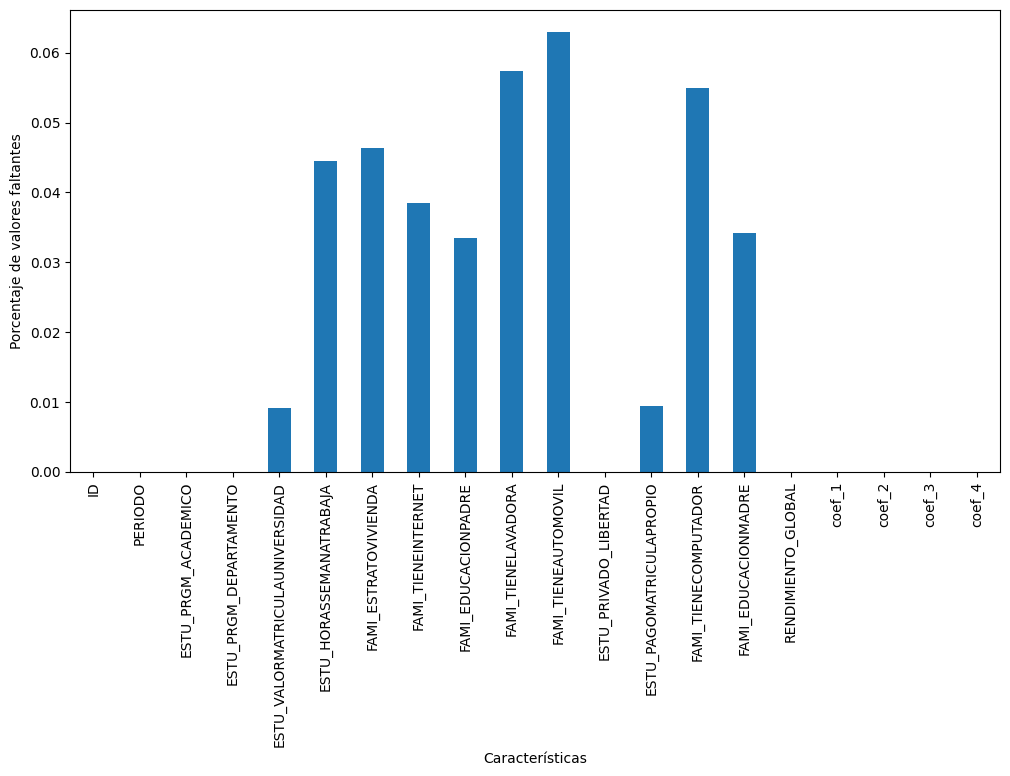

In [353]:
dtr.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Porcentaje de valores faltantes')
plt.xlabel('Características')

In [354]:
# 1. Mapas ordinales
mapa_valormatricula = {
    'Menos de 500 mil': 250_000,
    'Entre 500 mil y menos de 1 millón': 750_000,
    'Entre 1 millón y menos de 2.5 millones': 1_750_000,
    'Entre 2.5 millones y menos de 4 millones': 3_250_000,
    'Entre 4 millones y menos de 5.5 millones': 4_750_000,
    'Entre 5.5 millones y menos de 7 millones': 6_250_000,
    'Más de 7 millones': 8_000_000,
    'No pagó matrícula': 0
}

mapa_horas_trabajo = {
    '0': 0,
    'Menos de 10 horas': 5,
    'Entre 10 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35
}

# 2. Aplicar mapeo y rellenar con promedio
dtr['ESTU_VALORMATRICULAUNIVERSIDAD_num'] = dtr['ESTU_VALORMATRICULAUNIVERSIDAD'].map(mapa_valormatricula)
dtr['ESTU_HORASSEMANATRABAJA_num'] = dtr['ESTU_HORASSEMANATRABAJA'].map(mapa_horas_trabajo)

# Rellenar con promedio
dtr['ESTU_VALORMATRICULAUNIVERSIDAD_num'] = dtr['ESTU_VALORMATRICULAUNIVERSIDAD_num'].fillna(
    dtr['ESTU_VALORMATRICULAUNIVERSIDAD_num'].mean()
)
dtr['ESTU_HORASSEMANATRABAJA_num'] = dtr['ESTU_HORASSEMANATRABAJA_num'].fillna(
    dtr['ESTU_HORASSEMANATRABAJA_num'].mean()
)

# 3. Columnas categóricas: rellenar con ffill
columnas_ffill = [
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_TIENEINTERNET',
    'FAMI_EDUCACIONPADRE',
    'FAMI_TIENELAVADORA',
    'FAMI_TIENEAUTOMOVIL',
    'ESTU_PAGOMATRICULAPROPIO',
    'FAMI_TIENECOMPUTADOR',
    'FAMI_EDUCACIONMADRE'
]

for col in columnas_ffill:
    dtr[col] = dtr[col].fillna(method='ffill')

<ipython-input-354-1e7dff70c00d>:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dtr[col] = dtr[col].fillna(method='ffill')


In [355]:
dtr.drop(columns=['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA'], inplace=True)


In [356]:
# Ver en qué columnas hay nulos
dtr.isna().sum()[dtr.isna().sum() != 0]

,0


In [241]:
# Mostrar las variables numéricas

cols = [i for i in dtr.columns if i in dtr._get_numeric_data()]
print ( cols)

['ID', 'PERIODO', 'coef_1', 'coef_2', 'coef_3', 'coef_4', 'ESTU_VALORMATRICULAUNIVERSIDAD_num', 'ESTU_HORASSEMANATRABAJA_num']


In [242]:
# Mostrar las variables categóricas

ccols = [i for i in dtr.columns if not i in dtr._get_numeric_data()]
print (ccols)

['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL']


In [243]:
# Mostrar las opciones de respuesta para cada columna categórica

for c in dtr:
    print("%10s" % c, dtr[c].unique())


        ID [904256 645256 308367 ... 504185 986620 933374]
   PERIODO [20212 20203 20195 20183 20194 20213 20184 20202 20196]
ESTU_PRGM_ACADEMICO ['ENFERMERIA' 'DERECHO' 'MERCADEO Y PUBLICIDAD'
 'ADMINISTRACION DE EMPRESAS' 'PSICOLOGIA' 'MEDICINA VETERINARIA'
 'INGENIERIA MECANICA' 'ADMINISTRACIÓN EN SALUD OCUPACIONAL'
 'INGENIERIA INDUSTRIAL' 'ADMINISTRACIÓN FINANCIERA' 'HOTELERIA Y TURISMO'
 'LICENCIATURA EN CIENCIAS SOCIALES' 'LICENCIATURA EN PEDAGOGIA INFANTIL'
 'COMUNICACION SOCIAL' 'CIENCIA POLITICA'
 'PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL'
 'MAESTRO EN MÚSICA' 'INGENIERIA MECATRONICA' 'TRABAJO SOCIAL'
 'LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL' 'INGENIERIA CIVIL'
 'CONTADURIA PÚBLICA' 'ADMINISTRACION EN SALUD'
 'ADMINISTRACIÓN DE EMPRESAS' 'ESTADISTICA' 'LICENCIATURA EN BIOLOGIA'
 'INGENIERIA AGROINDUSTRIAL' 'ZOOTECNIA' 'COMUNICACION AUDIOVISUAL'
 'LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES'
 'COMUNICACION SOCIAL  - PERIODISMO' '

In [357]:
def limpiar_programa(texto):
    if pd.isnull(texto):
        return texto
    texto = texto.upper()
    texto = texto.strip()
    texto = texto.replace('Á','A').replace('É','E').replace('Í','I').replace('Ó','O').replace('Ú','U')
    texto = texto.replace('¿','').replace('¡','').replace('Ñ','N')
    texto = texto.replace('¿','').replace('¿','').replace('“','').replace('”','')
    texto = texto.replace('  ', ' ')
    texto = texto.replace('   ', ' ')
    texto = texto.replace('.', '')
    texto = texto.replace('-', ' ')
    texto = texto.replace('_', ' ')
    texto = texto.replace('   ', ' ')
    return texto

# Aplica la función
dtr['PROGRAMA_LIMPIO'] = dtr['ESTU_PRGM_ACADEMICO'].apply(limpiar_programa)


In [358]:
# Ver los programas más comunes
dtr['PROGRAMA_LIMPIO'].value_counts().head(20)


,count
PROGRAMA_LIMPIO,
ADMINISTRACION DE EMPRESAS,76679
DERECHO,53244
CONTADURIA PUBLICA,51924
PSICOLOGIA,49309
INGENIERIA INDUSTRIAL,34794
INGENIERIA CIVIL,21315
MEDICINA,18099
INGENIERIA DE SISTEMAS,18028
LICENCIATURA EN PEDAGOGIA INFANTIL,14850


In [359]:
# Clasificar áreas académicas

def clasificar_area(programa):
    programa = programa.upper()

    if any(p in programa for p in ['INGENIERIA', 'INGENIERÍA']):
        return 'Ingenierías'
    elif any(p in programa for p in ['MEDICINA', 'ENFERMERIA', 'SALUD', 'FISIOTERAPIA', 'ODONTOLOGIA', 'ENFERMERÍA', 'NUTRICION', 'NUTRICIÓN', 'TERAPIA', 'QUIRURGICA']):
        return 'Salud'
    elif any(p in programa for p in ['DERECHO', 'JURISPRUDENCIA']):
        return 'Derecho'
    elif any(p in programa for p in ['ADMINISTRACION', 'CONTADURIA', 'ECONOMIA', 'NEGOCIOS', 'FINANZAS', 'MARKETING', 'PUBLICIDAD', 'BANCA', 'GERENCIA', 'COMERCIO']):
        return 'Económico-administrativas'
    elif any(p in programa for p in ['BIOLOGIA', 'BIOLOGÍA', 'FISICA', 'FÍSICA', 'QUIMICA', 'QUÍMICA', 'MATEMATICA', 'MATEMÁTICA', 'ESTADISTICA', 'ESTADÍSTICA']):
        return 'Ciencias Básicas'
    elif any(p in programa for p in ['PSICOLOGIA', 'SOCIOLOGIA', 'TRABAJO SOCIAL', 'ANTROPOLOGIA', 'POLITICA', 'CIENCIAS SOCIALES', 'FILOSOFIA', 'PEDAGOGIA']):
        return 'Ciencias Sociales y Humanas'
    elif any(p in programa for p in ['ARTES', 'DISEÑO', 'MUSICA', 'TEATRO', 'DANZA', 'PLASTICAS', 'ESCENICAS', 'FOTOGRAFIA', 'GASTRONOMIA', 'CINE', 'LITERATURA']):
        return 'Artes'
    elif any(p in programa for p in ['LICENCIATURA', 'EDUCACION', 'ENSEÑANZA']):
        return 'Educación'
    elif any(p in programa for p in ['COMUNICACION', 'PERIODISMO', 'COMUNICACIÓN']):
        return 'Comunicación'
    elif any(p in programa for p in ['AGRONOMIA', 'ZOO', 'VETERINARIA', 'PECUARIA', 'FORESTAL', 'AMBIENTAL']):
        return 'Agropecuarias y Medio Ambiente'
    else:
        return 'Otras'


In [360]:
#  Clasificar por áreas
dtr['PROGRAMA_LIMPIO'] = dtr['ESTU_PRGM_ACADEMICO'].apply(limpiar_programa)

# Luego aplicas la clasificación
dtr['AREA_ACADEMICA'] = dtr['PROGRAMA_LIMPIO'].apply(clasificar_area)


In [361]:
dtr.drop(columns=['ESTU_PRGM_ACADEMICO', 'PROGRAMA_LIMPIO'], inplace=True)


In [362]:
dtr.head(5)

,ID,PERIODO,ESTU_PRGM_DEPARTAMENTO,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4,ESTU_VALORMATRICULAUNIVERSIDAD_num,ESTU_HORASSEMANATRABAJA_num,AREA_ACADEMICA
0,904256,20212,BOGOTÁ,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267,6250000.0,5.0,Salud
1,645256,20212,ATLANTICO,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264,3250000.0,0.0,Derecho
2,308367,20203,BOGOTÁ,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264,3250000.0,35.0,Económico-administrativas
3,470353,20195,SANTANDER,Estrato 4,Si,No sabe,Si,No,N,No,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190,4750000.0,0.0,Económico-administrativas
4,989032,20212,ANTIOQUIA,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294,3250000.0,25.0,Ciencias Sociales y Humanas


In [363]:
# Diccionario de columnas y su codificación a booleanos
binarios_bool = {
    'FAMI_TIENEINTERNET': {'Si': True, 'No': False},
    'FAMI_TIENELAVADORA': {'Si': True, 'No': False},
    'FAMI_TIENEAUTOMOVIL': {'Si': True, 'No': False},
    'ESTU_PRIVADO_LIBERTAD': {'S': True, 'N': False},
    'ESTU_PAGOMATRICULAPROPIO': {'Si': True, 'No': False},
    'FAMI_TIENECOMPUTADOR': {'Si': True, 'No': False}
}

# Mapear directamente los valores a booleanos en las columnas originales
for col, mapping in binarios_bool.items():
    if col in dtr.columns:
        dtr[col] = dtr[col].map(mapping).astype(bool)

In [364]:
# Diccionario de niveles educativos (menor a mayor)
educacion_orden = {
    'Ninguno': 1,
    'Primaria incompleta': 2,
    'Primaria completa': 3,
    'Secundaria (Bachillerato) incompleta': 4,
    'Secundaria (Bachillerato) completa': 5,
    'Técnica o tecnológica incompleta': 6,
    'Técnica o tecnológica completa': 7,
    'Educación profesional incompleta': 8,
    'Educación profesional completa': 9,
    'Postgrado': 10
}

# Diccionario para RENDIMIENTO_GLOBAL
rendimiento_orden = {
    'bajo': 1,
    'medio-bajo': 2,
    'medio-alto': 3,
    'alto': 4
}

# Diccionario para FAMI_ESTRATOVIVIENDA
estrato_orden = {
    'Estrato 1': 1,
    'Estrato 2': 2,
    'Estrato 3': 3,
    'Estrato 4': 4,
    'Estrato 5': 5,
    'Estrato 6': 6
}


In [365]:
# FAMI_EDUCACIONPADRE y FAMI_EDUCACIONMADRE - reemplazo y codificación
for col in ['FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE']:
    dtr[col] = dtr[col].replace(['Ninguno', 'No sabe', 'No Aplica'], np.nan).ffill()
    dtr[col + '_ord'] = dtr[col].map(educacion_orden)

# Codificación ordinal de RENDIMIENTO_GLOBAL
dtr['RENDIMIENTO_GLOBAL_ord'] = dtr['RENDIMIENTO_GLOBAL'].map(rendimiento_orden)


In [366]:
dtr.drop(columns=[
    'FAMI_ESTRATOVIVIENDA',
    'FAMI_EDUCACIONPADRE',
    'FAMI_EDUCACIONMADRE',
    'RENDIMIENTO_GLOBAL'
], inplace=True)


In [254]:
dtr.head(5)

,ID,PERIODO,ESTU_PRGM_DEPARTAMENTO,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,coef_3,coef_4,ESTU_VALORMATRICULAUNIVERSIDAD_num,ESTU_HORASSEMANATRABAJA_num,AREA_ACADEMICA,FAMI_EDUCACIONPADRE_ord,FAMI_EDUCACIONMADRE_ord,RENDIMIENTO_GLOBAL_ord
0,904256,20212,BOGOTÁ,True,True,True,False,False,True,0.322,0.208,0.310,0.267,6250000.0,5.0,Salud,6,10,3
1,645256,20212,ATLANTICO,False,True,False,False,False,True,0.311,0.215,0.292,0.264,3250000.0,0.0,Derecho,7,6,1
2,308367,20203,BOGOTÁ,True,True,False,False,False,False,0.297,0.214,0.305,0.264,3250000.0,35.0,Económico-administrativas,5,5,1
3,470353,20195,SANTANDER,True,True,False,False,False,True,0.485,0.172,0.252,0.190,4750000.0,0.0,Económico-administrativas,5,5,4
4,989032,20212,ANTIOQUIA,True,True,True,False,False,True,0.316,0.232,0.285,0.294,3250000.0,25.0,Ciencias Sociales y Humanas,3,3,2


In [367]:
# Columnas a convertir a one-hot encoding
columnas_onehot = ['PERIODO', 'ESTU_PRGM_DEPARTAMENTO', 'AREA_ACADEMICA']

# Aplicar one-hot encoding con valores booleanos
dtr = pd.get_dummies(dtr, columns=columnas_onehot, dtype=bool)

In [368]:
from sklearn.preprocessing import MinMaxScaler

# Lista de columnas numéricas a normalizar
columnas_a_normalizar = ['ESTU_VALORMATRICULAUNIVERSIDAD_num', 'ESTU_HORASSEMANATRABAJA_num']

# Crear el escalador MinMax
scaler = MinMaxScaler()

# Aplicar el escalador y convertir en DataFrame
dtr_normalizado = pd.DataFrame(scaler.fit_transform(dtr[columnas_a_normalizar]),
                                columns=[col + '_scaled' for col in columnas_a_normalizar])

# Concatenar las columnas normalizadas al DataFrame original
dtr = pd.concat([dtr, dtr_normalizado], axis=1)

# Opcional: eliminar las columnas originales no normalizadas
dtr.drop(columns=columnas_a_normalizar, inplace=True)


In [369]:
dtr.head(5)

,ID,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,coef_1,coef_2,coef_3,...,AREA_ACADEMICA_Ciencias Sociales y Humanas,AREA_ACADEMICA_Comunicación,AREA_ACADEMICA_Derecho,AREA_ACADEMICA_Económico-administrativas,AREA_ACADEMICA_Educación,AREA_ACADEMICA_Ingenierías,AREA_ACADEMICA_Otras,AREA_ACADEMICA_Salud,ESTU_VALORMATRICULAUNIVERSIDAD_num_scaled,ESTU_HORASSEMANATRABAJA_num_scaled
0,904256,True,True,True,False,False,True,0.322,0.208,0.310,...,False,False,False,False,False,False,False,True,0.78125,0.142857
1,645256,False,True,False,False,False,True,0.311,0.215,0.292,...,False,False,True,False,False,False,False,False,0.40625,0.000000
2,308367,True,True,False,False,False,False,0.297,0.214,0.305,...,False,False,False,True,False,False,False,False,0.40625,1.000000
3,470353,True,True,False,False,False,True,0.485,0.172,0.252,...,False,False,False,True,False,False,False,False,0.59375,0.000000
4,989032,True,True,True,False,False,True,0.316,0.232,0.285,...,True,False,False,False,False,False,False,False,0.40625,0.714286


In [300]:
print(dtr.columns.tolist())

['ID', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'coef_1', 'coef_2', 'coef_3', 'coef_4', 'FAMI_EDUCACIONPADRE_ord', 'FAMI_EDUCACIONMADRE_ord', 'RENDIMIENTO_GLOBAL_ord', 'PERIODO_20183', 'PERIODO_20184', 'PERIODO_20194', 'PERIODO_20195', 'PERIODO_20196', 'PERIODO_20202', 'PERIODO_20203', 'PERIODO_20212', 'PERIODO_20213', 'ESTU_PRGM_DEPARTAMENTO_AMAZONAS', 'ESTU_PRGM_DEPARTAMENTO_ANTIOQUIA', 'ESTU_PRGM_DEPARTAMENTO_ARAUCA', 'ESTU_PRGM_DEPARTAMENTO_ATLANTICO', 'ESTU_PRGM_DEPARTAMENTO_BOGOTÁ', 'ESTU_PRGM_DEPARTAMENTO_BOLIVAR', 'ESTU_PRGM_DEPARTAMENTO_BOYACA', 'ESTU_PRGM_DEPARTAMENTO_CALDAS', 'ESTU_PRGM_DEPARTAMENTO_CAQUETA', 'ESTU_PRGM_DEPARTAMENTO_CASANARE', 'ESTU_PRGM_DEPARTAMENTO_CAUCA', 'ESTU_PRGM_DEPARTAMENTO_CESAR', 'ESTU_PRGM_DEPARTAMENTO_CHOCO', 'ESTU_PRGM_DEPARTAMENTO_CORDOBA', 'ESTU_PRGM_DEPARTAMENTO_CUNDINAMARCA', 'ESTU_PRGM_DEPARTAMENTO_GUAVIARE', 'ESTU_PRGM_DEPARTAMENTO_HUILA'

In [370]:
print(dtr['FAMI_EDUCACIONPADRE_ord'].head(5))

0    6
1    7
2    5
3    5
4    3
Name: FAMI_EDUCACIONPADRE_ord, dtype: int64
